In [1]:
# Importing standard libraries
import joblib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import warnings
from tqdm import tqdm

# Importing sklearn libraries
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import LinearSVC, SVC

# Importing nltk libraries
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Importing scipy library
from scipy.sparse import hstack

# Importing xgboost library
from xgboost import XGBClassifier

# Suppressing warnings
warnings.filterwarnings('ignore')

# Installing xgboost
!pip install xgboost

# Loading the data
path = '../BDS_project/final_new_data_processed.csv'
data = pd.read_csv(path)

# Preparing the data
X = data.drop(['review','rating','date','review_sentiment'],axis=1)
y = data['review_sentiment'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.30, random_state=42)


In [2]:
data.head(3)

,drugName,condition,review,rating,date,usefulCount,review_sentiment,cleaned_review,sentiment_score,sentiment_score_clean,...,10,11,12,13,14,15,16,17,18,19
0,valsartan,left ventricular dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,1,no side effect take combin bystol mg fish oil,-0.2960,-0.2960,...,0.362931,0.014787,0.007693,0.009125,0.103094,0.010545,0.064428,0.011921,0.014735,0.006619
1,guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,1,son halfway fourth week intuniv becam concern ...,0.8603,0.6929,...,0.557999,0.006869,0.003574,0.004239,0.008950,0.004899,0.125459,0.005538,0.006845,0.003075
2,lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,0,use take anoth oral contracept pill cycl happi...,0.7962,0.2732,...,0.455916,0.006802,0.003539,0.004205,0.008863,0.004851,0.048923,0.005484,0.006778,0.003045


In [2]:
columns = ['usefulCount','word_count','unique_word_count','char_length','count_punctuations','stopword_count',
               'mean_word_len','subj_count','obj_count','CARDINAL','DATE','EVENT','FAC','GPE','LANGUAGE','LAW',
            'LOC','MONEY','NORP','ORDINAL','ORG', 'PERCENT','PERSON', 'PRODUCT','QUANTITY','TIME','WORK_OF_ART',
           '0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

In [4]:
normalizer = Normalizer()

X_train_num_1 = normalizer.fit_transform(X_train[columns])
X_test_num_1 = normalizer.fit_transform(X_test[columns])
X_cv_num_1 = normalizer.fit_transform(X_cv[columns])

X_train_sent_score = X_train[['sentiment_score','sentiment_score_clean']].values
X_test_sent_score = X_test[['sentiment_score','sentiment_score_clean']].values
X_cv_sent_score = X_cv[['sentiment_score','sentiment_score_clean']].values

X_tr_1 = np.concatenate((X_train_num_1,X_train_sent_score),axis=1)
X_te_1 = np.concatenate((X_test_num_1,X_test_sent_score),axis=1)
X_cv_1 = np.concatenate((X_cv_num_1,X_cv_sent_score),axis=1)

After vectorizations
(103927, 47) (103927,)
(63630, 47) (63630,)
(44541, 47) (44541,)


In [ ]:
normalizer = Normalizer()

X_train_num_1 = normalizer.fit_transform(X_train[columns])
X_test_num_1 = normalizer.fit_transform(X_test[columns])
X_cv_num_1 = normalizer.fit_transform(X_cv[columns])


In [40]:
X_train_sent_score = X_train[['sentiment_score','sentiment_score_clean']].values
X_test_sent_score = X_test[['sentiment_score','sentiment_score_clean']].values
X_cv_sent_score = X_cv[['sentiment_score','sentiment_score_clean']].values

X_tr_1 = np.concatenate((X_train_num_1,X_train_sent_score),axis=1)
X_te_1 = np.concatenate((X_test_num_1,X_test_sent_score),axis=1)
X_cv_1 = np.concatenate((X_cv_num_1,X_cv_sent_score),axis=1)


SyntaxError: invalid syntax (101951231.py, line 2)

In [6]:
#concatenating all encoded features for set 1

from scipy.sparse import hstack
X_tr_1 = np.concatenate((X_train_num_1,X_train_sent_score),axis=1)

X_te_1 = np.concatenate((X_test_num_1,X_test_sent_score),axis=1)

X_cv_1 = np.concatenate((X_cv_num_1,X_cv_sent_score),axis=1)

Final Data matrix
(103927, 49) (103927,)
(63630, 49) (63630,)
(44541, 49) (44541,)


## Modelling

In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.metrics import log_loss, accuracy_score,confusion_matrix, f1_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import joblib

In [9]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]
    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

In [10]:
def model_metrics(clf,train_data,test_data,cv_data):

    print('**LogLoss**')
    predict_y = clf.predict_proba(train_data)
    print ("The train log loss is:",log_loss(y_train, predict_y))
    predict_y = clf.predict_proba(cv_data)
    print( "The cross validation log loss is:",log_loss(y_cv, predict_y))
    predict_y = clf.predict_proba(test_data)
    print( "The test log loss is:",log_loss(y_test, predict_y))

    print(50*'-')

    print('**Accuracy**')
    y_pred_tr = clf.predict(train_data)
    print ("The train Accuracy is:",accuracy_score(y_train, y_pred_tr))
    y_pred_cv = clf.predict(cv_data)
    print( "The cross validation Accuracy is:",accuracy_score(y_cv, y_pred_cv))
    y_pred_te = clf.predict(test_data)
    print( "The test Accuracy is:",accuracy_score(y_test, y_pred_te))

    print(50*'-')


    print('**F1 Score**')
    print ("The train F1 score is:",f1_score(y_train, y_pred_tr))
    print( "The cross validation F1 score is:",f1_score(y_cv, y_pred_cv))
    print( "The test F1 score is:",f1_score(y_test, y_pred_te))

    print(50*'-')

    print('**AUC**')
    print ("The train AUC is:",roc_auc_score(y_train, y_pred_tr))
    print( "The cross validation AUC is:",roc_auc_score(y_cv, y_pred_cv))
    print( "The test AUC is:",roc_auc_score(y_test, y_pred_te))

    print(50*'-')

In [11]:
from sklearn.preprocessing import LabelEncoder
lab_enc_year = LabelEncoder()

lab_enc_year.fit(X['year'].values)

X_train_year = lab_enc_year.transform(X_train['year'].values).reshape(-1,1)
X_test_year = lab_enc_year.transform(X_test['year'].values).reshape(-1,1)
X_cv_year = lab_enc_year.transform(X_cv['year'].values).reshape(-1,1)

print('After Encoding')
print('Train data shape',X_train_year.shape)
print('Test data shape',X_test_year.shape)
print('CV data shape',X_cv_year.shape)

After Encoding
Train data shape (103927, 1)
Test data shape (63630, 1)
CV data shape (44541, 1)


In [12]:
drop_col = ['subj_count', 'obj_count', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY',
 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', '9', '14']

X_train = X_train.drop(drop_col,axis=1)
X_test = X_test.drop(drop_col,axis=1)
X_cv = X_cv.drop(drop_col,axis=1)

print("After dropping the columns the new shapes are:")
print('Train data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('CV data size:',X_cv.shape)

After dropping the columns the new shapes are:
Train data size: (103927, 33)
Test data size: (63630, 33)
CV data size: (44541, 33)


In [13]:
imp_columns = ['usefulCount','word_count', 'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'TIME', 'WORK_OF_ART', '0', '1', '2',
               '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '15', '16', '17', '18', '19']
# Normalizing the features after dropping the unimportant features

normalizer = Normalizer()

X_train_num_2 = normalizer.fit_transform(X_train[imp_columns])
X_test_num_2 = normalizer.fit_transform(X_test[imp_columns])
X_cv_num_2 = normalizer.fit_transform(X_cv[imp_columns])

print("After vectorizations")
print(X_train_num_2.shape, y_train.shape)
print(X_test_num_2.shape, y_test.shape)
print(X_cv_num_2.shape, y_cv.shape)


After vectorizations
(103927, 27) (103927,)
(63630, 27) (63630,)
(44541, 27) (44541,)


In [14]:
from sklearn.preprocessing import LabelEncoder

lab_enc_cond = LabelEncoder()

lab_enc_cond.fit(X['condition'].values)

X_train_condition = lab_enc_cond.transform(X_train['condition'].values).reshape(-1,1)
X_test_condition = lab_enc_cond.transform(X_test['condition'].values).reshape(-1,1)
X_cv_condition = lab_enc_cond.transform(X_cv['condition'].values).reshape(-1,1)

In [ ]:
from scipy.sparse import hstack
X_tr_1 = np.concatenate((X_train_num_2,X_train_sent_score),axis=1)

X_te_1 = np.concatenate((X_test_num_2,X_test_sent_score),axis=1)

X_cv_1 = np.concatenate((X_cv_num_2,X_cv_sent_score),axis=1)

print("Final Data matrix")
print(X_tr_1.shape, y_train.shape)
print(X_te_1.shape, y_test.shape)
print(X_cv_1.shape, y_cv.shape)

### Random Model

In [12]:
test_len = len(y_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)

print("Accuray on Test Data using Random Model",accuracy_score(y_test, predicted_y))
print("F1 score on Test Data using Random Model",f1_score(y_test, predicted_y))
print("AUC on Test Data using Random Model",roc_auc_score(y_test, predicted_y))


Log loss on Test Data using Random Model 0.8794795049830448
Accuray on Test Data using Random Model 0.5028131384567028
F1 score on Test Data using Random Model 0.5865007580906573
AUC on Test Data using Random Model 0.5026771369813441


Number of misclassified points  49.71868615432972


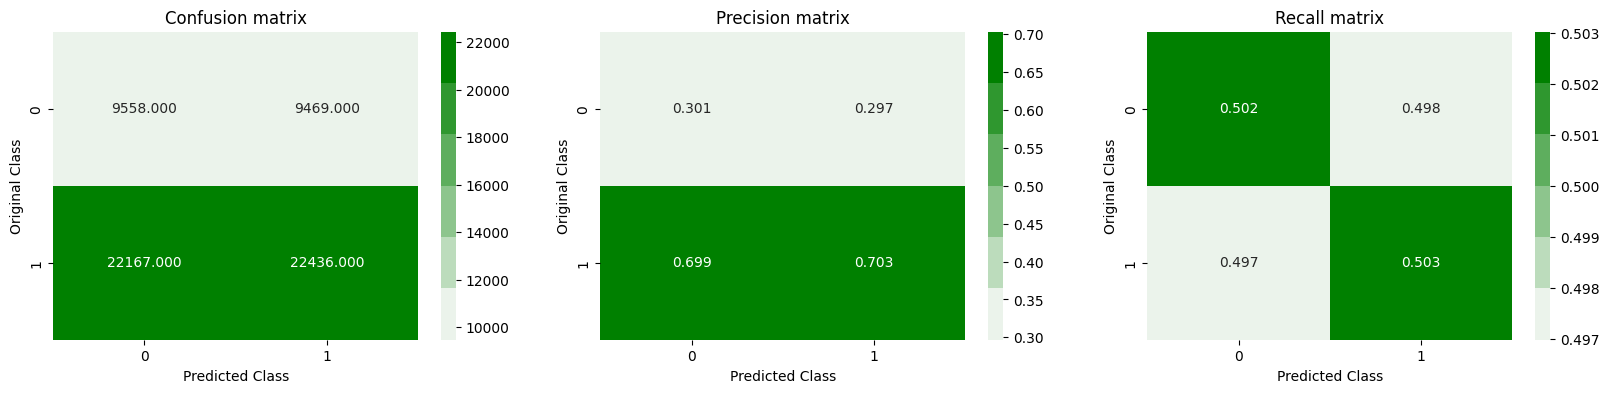

In [13]:
plot_confusion_matrix(y_test,predicted_y)

Observation:
- The Random model shows that the worst case log loss,F1 score, Accuracy and AUC.

### K Nearest Neighbour Classification

In [14]:
param ={'n_neighbors': [x for x in range(1, 15, 2)]}

k_cfl = KNeighborsClassifier()

random_kcfl = RandomizedSearchCV(k_cfl,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
random_kcfl.fit(X_tr_1,y_train)

print(random_kcfl.best_params_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'n_neighbors': 13}


**LogLoss**
The train log loss is: 0.4955295110068665
The cross validation log loss is: 0.5340962997042404
The test log loss is: 0.5342011855308404
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.756531026585969
The cross validation Accuracy is: 0.7320895354841607
The test Accuracy is: 0.7314159987427314
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.843324107270014
The cross validation F1 score is: 0.827684798775469
The test F1 score is: 0.8274120902425723
--------------------------------------------------
**AUC**
The train AUC is: 0.6367395454524185
The cross validation AUC is: 0.6072020892608808
The test AUC is: 0.6057052601649209
--------------------------------------------------
Number of misclassified points  26.858400125726856


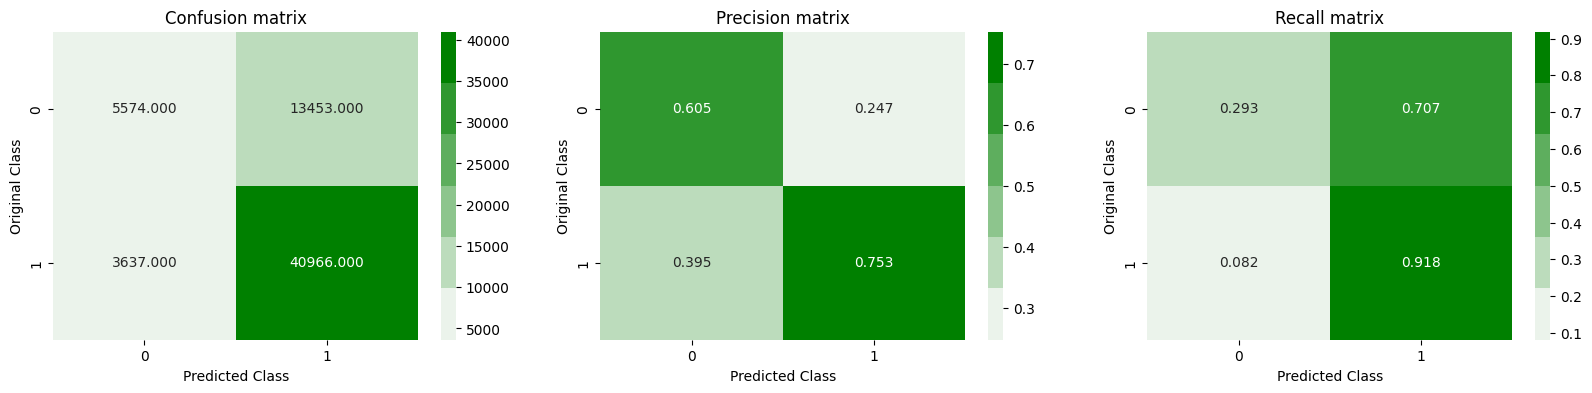

In [15]:
k_cfl=KNeighborsClassifier(n_neighbors=13,n_jobs=-1)
k_cfl.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)

model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))


### Logistic Regression

In [16]:
param = {'C':[10 ** x for x in range(-5, 4)]}

logisticR=LogisticRegression(penalty='l2',class_weight='balanced')

random_lr = RandomizedSearchCV(logisticR,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
random_lr.fit(X_tr_1,y_train)

print(random_lr.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'C': 1000}


**LogLoss**
The train log loss is: 0.5357801971700231
The cross validation log loss is: 0.5350928055674667
The test log loss is: 0.5363154589503704
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7327739663417591
The cross validation Accuracy is: 0.7342448530567343
The test Accuracy is: 0.7324846770391324
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8251948084645694
The cross validation F1 score is: 0.8262152599356952
The test F1 score is: 0.8251176361805741
--------------------------------------------------
**AUC**
The train AUC is: 0.6205130868962049
The cross validation AUC is: 0.622021013086153
The test AUC is: 0.6196976294008634
--------------------------------------------------
Number of misclassified points  26.75153229608675


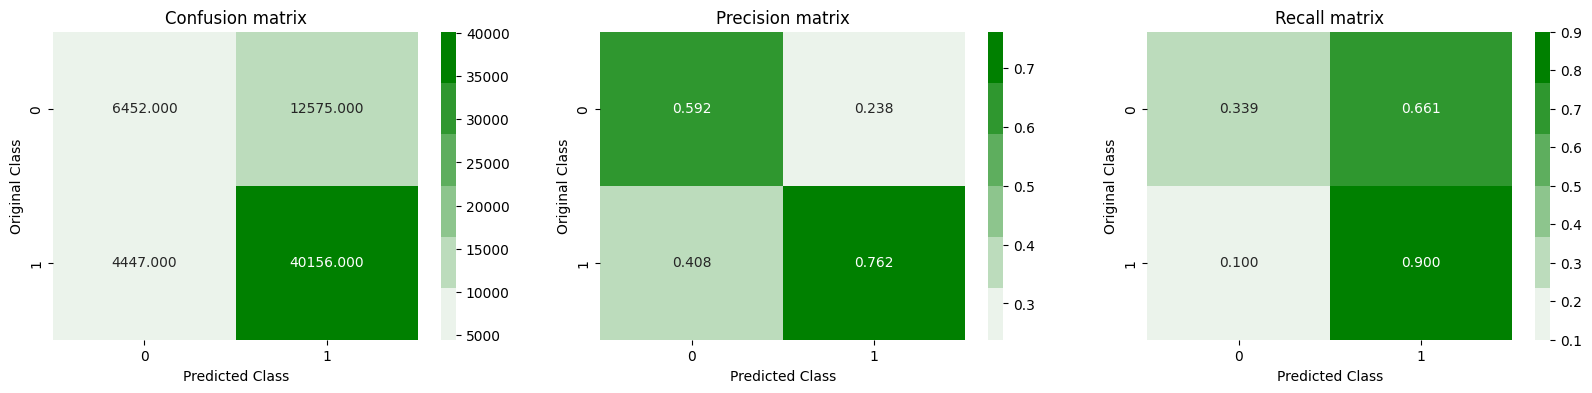

In [17]:
logisticR=LogisticRegression(C=100 ,penalty='l2',class_weight='balanced',n_jobs=-1)
logisticR.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

### Linear Support Vector Classification

In [18]:
param= {'C':[0.001,1,10,100]}

linSVC=LinearSVC(penalty='l2',loss='hinge')

random_svc = RandomizedSearchCV(linSVC,param_distributions=param,scoring='f1',verbose=1,n_jobs=-1,cv=3)
random_svc.fit(X_tr_1,y_train)

print(random_svc.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'C': 0.001}


**LogLoss**
The train log loss is: 0.5575041225422473
The cross validation log loss is: 0.5575125635829865
The test log loss is: 0.5582951047180065
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.7166568841590732
The cross validation Accuracy is: 0.7188433129027189
The test Accuracy is: 0.7153543925821153
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.8229145994575643
The cross validation F1 score is: 0.8240830488712827
The test F1 score is: 0.822030067799941
--------------------------------------------------
**AUC**
The train AUC is: 0.5670981258860823
The cross validation AUC is: 0.5705662765616655
The test AUC is: 0.5658446258254592
--------------------------------------------------
Number of misclassified points  28.464560741788464


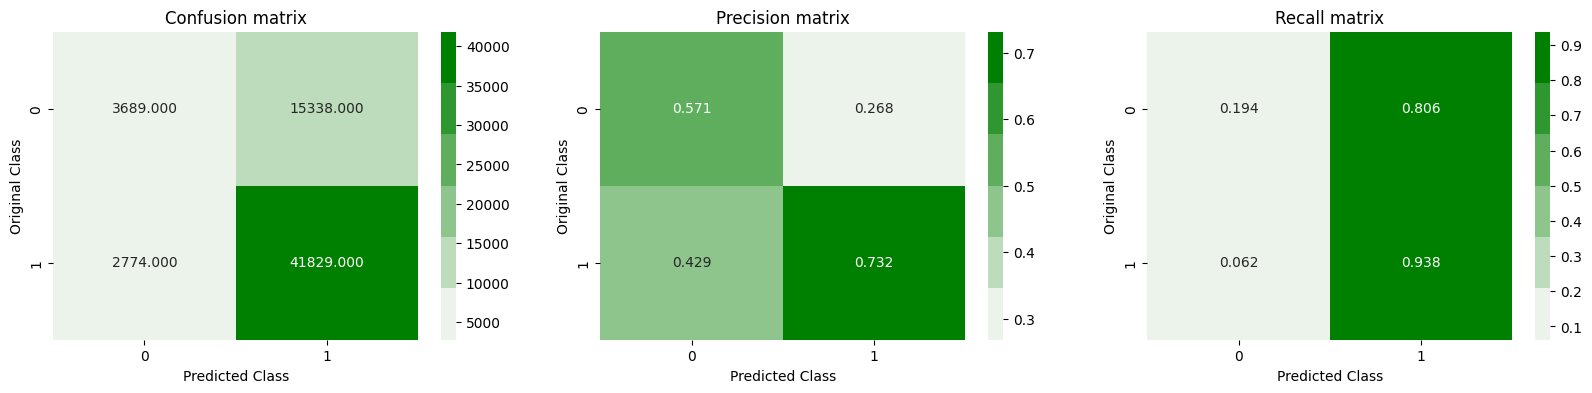

In [19]:
linSVC=LinearSVC(C=0.001 ,penalty='l2',loss='hinge')
linSVC.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(linSVC, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

### Random Forest Classifier

In [20]:
param = {'n_estimators':[100,500,1000,2000,3000]}

rf_clf =RandomForestClassifier(random_state=42,n_jobs=-1)

random_rf = RandomizedSearchCV(rf_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_rf.fit(X_tr_1,y_train)

print(random_rf.best_params_)

{'n_estimators': 3000}


In [ ]:
rf_clf =RandomForestClassifier(n_estimators=3000 ,random_state=42,n_jobs=-1)
rf_clf.fit(X_tr_1,y_train)
sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

### XGBOOST Classifier

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

x_clf =XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_xgb.fit(X_tr_1,y_train)

print(random_xgb.best_params_)

In [ ]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_1, y_train), (X_te_1, y_test)]

x_clf =XGBClassifier(n_estimators=3000,nthread=-1,eval_metric='logloss',objective='binary:logistic',random_state=0)
x_clf.fit(X_tr_1,y_train,eval_set=eval_set,verbose=0)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_1, y_train)


model_metrics(sig_clf,X_tr_1,X_te_1,X_cv_1)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, sig_clf.predict(X_te_1))

<b> Observations:</b>
- For all the numerical features, the Random Forest and XGB Classifiers works well but both of them are observed to be overfitting. We need to tune the hyperparameters to avoid overfitting in later stages.
- Using Random Forest classifier, the important numerical features can be selected for further modelling.

In [20]:
columns = ['usefulCount', 'sentiment_score', 'sentiment_score_clean', 'word_count',
       'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'subj_count', 'obj_count',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19']

In [21]:
# https://chrisalbon.com/code/machine_learning/trees_and_forests/feature_selection_using_random_forest/
# https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

from sklearn.feature_selection import SelectFromModel

def feature_selection_RF(classifier,train_data):

    '''this function takes classifier and data as input and returns the columns/features need to be dropped'''

    model = SelectFromModel(classifier,prefit=True)

    X_new = model.transform(train_data)

    print('Important features count from RF feature importance are:',X_new.shape)

    idx = list(model.get_support())
    col= np.array(columns)
    imp_col = col[idx]
    all_col = columns
    drop_col=[]
    for i in all_col:
        if i not in imp_col:
            drop_col.append(i)
    print('Count of features to be dropped:',len(drop_col))

    return drop_col


In [22]:
drop_col = feature_selection_RF(rf_clf,X_tr_1) # feature selection using RF feature importances

NameError: name 'rf_clf' is not defined

In [ ]:
drop_col

- From Random Forest feature selection, 20 features can be dropped from our dataset and consider the 29 features for next step of modelling

In [23]:
drop_col = ['subj_count', 'obj_count', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY',
 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', '9', '14']

In [24]:
X_train = X_train.drop(drop_col,axis=1)
X_test = X_test.drop(drop_col,axis=1)
X_cv = X_cv.drop(drop_col,axis=1)

print("After dropping the columns the new shapes are:")
print('Train data size:',X_train.shape)
print('Test data size:',X_test.shape)
print('CV data size:',X_cv.shape)

After dropping the columns the new shapes are:
Train data size: (103927, 33)
Test data size: (63630, 33)
CV data size: (44541, 33)


In [25]:
X_train.columns

Index(['drugName', 'condition', 'usefulCount', 'cleaned_review',
       'sentiment_score', 'sentiment_score_clean', 'year', 'word_count',
       'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'TIME', 'WORK_OF_ART', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '15', '16', '17',
       '18', '19'],
      dtype='object')

In [26]:
imp_columns = ['usefulCount','word_count', 'unique_word_count', 'char_length', 'count_punctuations',
       'stopword_count', 'mean_word_len', 'TIME', 'WORK_OF_ART', '0', '1', '2',
               '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '15', '16', '17', '18', '19']


In [27]:
# Normalizing the features after dropping the unimportant features

normalizer = Normalizer()

X_train_num_2 = normalizer.fit_transform(X_train[imp_columns])
X_test_num_2 = normalizer.fit_transform(X_test[imp_columns])
X_cv_num_2 = normalizer.fit_transform(X_cv[imp_columns])

print("After vectorizations")
print(X_train_num_2.shape, y_train.shape)
print(X_test_num_2.shape, y_test.shape)
print(X_cv_num_2.shape, y_cv.shape)


After vectorizations
(103927, 27) (103927,)
(63630, 27) (63630,)
(44541, 27) (44541,)


### Set - 1 : Important Numerical Features + Sentiment Scores

In [ ]:
#concatenating all encoded features for set 1

from scipy.sparse import hstack
X_tr_1 = np.concatenate((X_train_num_2,X_train_sent_score),axis=1)

X_te_1 = np.concatenate((X_test_num_2,X_test_sent_score),axis=1)

X_cv_1 = np.concatenate((X_cv_num_2,X_cv_sent_score),axis=1)

print("Final Data matrix")
print(X_tr_1.shape, y_train.shape)
print(X_te_1.shape, y_test.shape)
print(X_cv_1.shape, y_cv.shape)

#### HyperParameter Tuning on XGBClassifier

In [ ]:
x_cfl_1 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10,30,50],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_1 = RandomizedSearchCV(x_cfl_1,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_1.fit(X_tr_1,y_train)

print(x_random_cfl_1.best_params_)
print(x_random_cfl_1.best_score_)

#### Training the XGB Classifier with Best parameters

In [14]:
# Here early stopping parameter has been used as in the above xgboost model there is an overfitting
# occured with same 3000 estimators


eval_set = [(X_tr_1, y_train), (X_cv_1, y_cv)]

x_cfl_1=XGBClassifier(n_estimators=3000,subsample=1,max_depth=30,learning_rate=0.2,colsample_bytree=0.5,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_1.fit(X_tr_1,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)
x_sig_clf_1 = CalibratedClassifierCV(x_cfl_1, method="sigmoid")
x_sig_clf_1.fit(X_tr_1, y_train)

model_metrics(x_sig_clf_1,X_tr_1,X_te_1,X_cv_1)
results = x_cfl_1.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_1.predict(X_te_1))

NameError: name 'model_metrics' is not defined

In [16]:
model_metrics(x_sig_clf_1,X_tr_1,X_te_1,X_cv_1)

**LogLoss**
The train log loss is: 0.1644719243540991
The cross validation log loss is: 0.3906188410866541
The test log loss is: 0.39112911593958577
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9999518893069174
The cross validation Accuracy is: 0.8511708313688512
The test Accuracy is: 0.8517051705170517
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.9999656831456202
The cross validation F1 score is: 0.8982829786254622
The test F1 score is: 0.898785772514695
--------------------------------------------------
**AUC**
The train AUC is: 0.9999287822822562
The cross validation AUC is: 0.7931422205621412
The test AUC is: 0.7928268415959463
--------------------------------------------------


In [ ]:
results = x_cfl_1.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_1.predict(X_te_1))

In [17]:
import joblib

In [18]:
print('Extracted features Model saved..')

joblib.dump(x_sig_clf_1, '../BDS_project/extracted_model.pkl')

Extracted features Model saved..


['../BDS_project/extracted_model.pkl']

<b>Observations:
- The XGB classifier with hyper parameter tuning performs well on Set 1 features with log loss of 0.3998 and F1 scoe of 0.895
- This model is saved for Set 1 features

### Set -2 Extracted Features + Sentiment Scores + Reviews Bow (uni-gram) vectors

In [16]:
from sklearn.preprocessing import LabelEncoder
lab_enc_year = LabelEncoder()

lab_enc_year.fit(X['year'].values)

X_train_year = lab_enc_year.transform(X_train['year'].values).reshape(-1,1)
X_test_year = lab_enc_year.transform(X_test['year'].values).reshape(-1,1)
X_cv_year = lab_enc_year.transform(X_cv['year'].values).reshape(-1,1)

print('After Encoding')
print('Train data shape',X_train_year.shape)
print('Test data shape',X_test_year.shape)
print('CV data shape',X_cv_year.shape)

After Encoding
Train data shape (103927, 1)
Test data shape (63630, 1)
CV data shape (44541, 1)


In [32]:
vect_bow_1 = joblib.load('../BDS_project/vectorizer_bow.pkl')

X_train_review_bow_1 = vect_bow_1.transform(X_train['cleaned_review'].values)
X_test_review_bow_1 = vect_bow_1.transform(X_test['cleaned_review'].values)
X_cv_review_bow_1 = vect_bow_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_bow_1.shape)
print('Test data shape:',X_test_review_bow_1.shape)
print('CV data shape:',X_cv_review_bow_1.shape)

After Vectorization
Train data shape: (103927, 7309)
Test data shape: (63630, 7309)
CV data shape: (44541, 7309)


In [33]:
#concatenating all encoded features for set 2

from sklearn.preprocessing import LabelEncoder

lab_enc_cond = LabelEncoder()

lab_enc_cond.fit(X['condition'].values)

X_train_condition = lab_enc_cond.transform(X_train['condition'].values).reshape(-1,1)
X_test_condition = lab_enc_cond.transform(X_test['condition'].values).reshape(-1,1)
X_cv_condition = lab_enc_cond.transform(X_cv['condition'].values).reshape(-1,1)

from scipy.sparse import hstack
X_tr_2 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_bow_1)).tocsr()

X_te_2 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_bow_1)).tocsr()

X_cv_2 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_bow_1)).tocsr()

print("Final Data matrix")
print(X_tr_2.shape, y_train.shape)
print(X_te_2.shape, y_test.shape)
print(X_cv_2.shape, y_cv.shape)

Final Data matrix
(103927, 7340) (103927,)
(63630, 7340) (63630,)
(44541, 7340) (44541,)


#### Random Forest Classifier on Set 2 Features

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

rf_clf =RandomForestClassifier(random_state=42,n_jobs=-1)

random_rf = RandomizedSearchCV(rf_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_rf.fit(X_tr_2,y_train)

print(random_rf.best_params_)

In [ ]:
rf_clf =RandomForestClassifier(n_estimators=3000 ,random_state=42,n_jobs=-1)
rf_clf.fit(X_tr_2,y_train)
sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
sig_clf.fit(X_tr_2, y_train)


model_metrics(sig_clf,X_tr_2,X_te_2,X_cv_2)

plot_confusion_matrix(y_test, sig_clf.predict(X_te_2))

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

x_clf =XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_xgb.fit(X_tr_2,y_train)

print(random_xgb.best_params_)

In [ ]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_2, y_train), (X_cv_2, y_cv)]

x_clf =XGBClassifier(n_estimators=3000,nthread=-1,objective='binary:logistic',random_state=0)
x_clf.fit(X_tr_2,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_2, y_train)


model_metrics(sig_clf,X_tr_2,X_te_2,X_cv_2)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, sig_clf.predict(X_te_2))

#### HyperParameter Tuning on XGBClassifier

In [ ]:
x_cfl_2 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_2 = RandomizedSearchCV(x_cfl_2,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_2.fit(X_tr_2,y_train)

print(x_random_cfl_2.best_params_)

#### Training XGBClassifier with best parameters

**LogLoss**
The train log loss is: 0.11819432211766616
The cross validation log loss is: 0.2799097542289693
The test log loss is: 0.281467631969251
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9811790968660694
The cross validation Accuracy is: 0.8908421454390337
The test Accuracy is: 0.8904919063334905
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.9866146581810716
The cross validation F1 score is: 0.9237859359814402
The test F1 score is: 0.9235847608185468
--------------------------------------------------
**AUC**
The train AUC is: 0.9755602733504178
The cross validation AUC is: 0.8552784580365793
The test AUC is: 0.8544724700360167
--------------------------------------------------


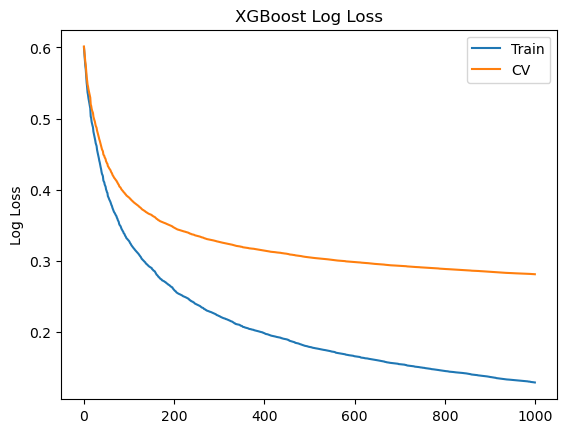

NameError: name 'plot_confusion_matrix' is not defined

In [36]:
eval_set = [(X_tr_2, y_train), (X_cv_2, y_cv)]

x_cfl_2=XGBClassifier(n_estimators=1000,subsample=1,max_depth=10,learning_rate=0.1,colsample_bytree=0.1,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_2.fit(X_tr_2,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=20)
x_sig_clf_2 = CalibratedClassifierCV(x_cfl_2, method="sigmoid")
x_sig_clf_2.fit(X_tr_2, y_train)

model_metrics(x_sig_clf_2,X_tr_2,X_te_2,X_cv_2)

results = x_cfl_2.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_2.predict(X_te_2))

In [37]:
import joblib
print('BoW Model saved..')
joblib.dump(x_sig_clf_2, '../BDS_project/Bow_model.pkl')

BoW Model saved..


['../BDS_project/Bow_model.pkl']

<b>Observations:
- The XGB classifier with hyper parameter tuning gives log loss of 0.278 and F1 score of 0.925  for set 2 features
- For Bow representation, this model is saved.

In [38]:
print('hello')

hello


### Set -3 Extracted Features + Sentiment Scores + Reviews TF-IDF (uni-gram) vectors

In [39]:
vect_tfidf_1 = joblib.load('../BDS_project/vectorizer_tfidf.pkl')


X_train_review_tfidf_1 = vect_tfidf_1.transform(X_train['cleaned_review'].values)
X_test_review_tfidf_1 = vect_tfidf_1.transform(X_test['cleaned_review'].values)
X_cv_review_tfidf_1 = vect_tfidf_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_tfidf_1.shape)
print('Test data shape:',X_test_review_tfidf_1.shape)
print('CV data shape:',X_cv_review_tfidf_1.shape)

After Vectorization
Train data shape: (103927, 7309)
Test data shape: (63630, 7309)
CV data shape: (44541, 7309)


In [40]:
#concatenating all encoded features for set 3

from scipy.sparse import hstack
X_tr_3 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_tfidf_1)).tocsr()

X_te_3 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_tfidf_1)).tocsr()

X_cv_3 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_tfidf_1)).tocsr()

print("Final Data matrix")
print(X_tr_3.shape, y_train.shape)
print(X_te_3.shape, y_test.shape)
print(X_cv_3.shape, y_cv.shape)



Final Data matrix
(103927, 7340) (103927,)
(63630, 7340) (63630,)
(44541, 7340) (44541,)


#### XGB Classifier on Set 3 Features

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

x_clf =XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_xgb.fit(X_tr_3,y_train)

print(random_xgb.best_params_)

In [ ]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_3, y_train), (X_cv_3, y_cv)]

x_clf =XGBClassifier(n_estimators=3000,nthread=-1,objective='binary:logistic',random_state=0)
x_clf.fit(X_tr_3,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_3, y_train)


model_metrics(sig_clf,X_tr_3,X_te_3,X_cv_3)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, sig_clf.predict(X_te_3))

#### Hyperparameter Tuning for XGB Classifier  

In [ ]:
x_cfl_3 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_3 = RandomizedSearchCV(x_cfl_3,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_3.fit(X_tr_3,y_train)

print(x_random_cfl_3.best_params_)

#### Training the XGB Classifier with best parameters

**LogLoss**
The train log loss is: 0.14024900582542763
The cross validation log loss is: 0.2928779370928213
The test log loss is: 0.29542716042382683
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9706139886651207
The cross validation Accuracy is: 0.8839047170023124
The test Accuracy is: 0.8834669181203835
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.9791615491689183
The cross validation F1 score is: 0.9190475444995851
The test F1 score is: 0.9187423975102189
--------------------------------------------------
**AUC**
The train AUC is: 0.96099465709564
The cross validation AUC is: 0.8461109268628019
The test AUC is: 0.8455890077303999
--------------------------------------------------


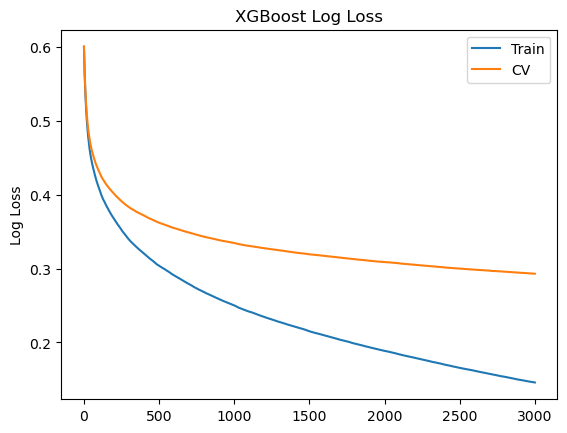

NameError: name 'plot_confusion_matrix' is not defined

In [41]:
eval_set = [(X_tr_3, y_train), (X_cv_3, y_cv)]

x_cfl_3=XGBClassifier(n_estimators=3000,subsample=0.3,max_depth=7,learning_rate=0.05,colsample_bytree=1,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_3.fit(X_tr_3,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)
x_sig_clf_3 = CalibratedClassifierCV(x_cfl_3, method="sigmoid")
x_sig_clf_3.fit(X_tr_3, y_train)

model_metrics(x_sig_clf_3,X_tr_3,X_te_3,X_cv_3)

results = x_cfl_3.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_3.predict(X_te_3))

In [ ]:
print('TF-IDF Model saved..')
joblib.dump(x_sig_clf_3, '../BDS_project/tfidf_model.pkl')


<b> Observations:
- The XGB Classifier with hyper parameter tuning performs well on Set 3 Features with log loss of 0.293 and F1 score of 0.9190
- This model is saved for Set 3 Features

### Set -4 Extracted Features + Sentiment Scores + Reviews BoW (n-gram) vectors

- Based on onbservation of some words like 'absolut no side effect', 'no side effect', 'almost no side effect', 'great no pain'. Considering the 2,3,4 grams and vocabulary as words with only no exists in it.

In [12]:
ngram_vec_bow = CountVectorizer(min_df=10,ngram_range=(2,4))
ngram_vec_bow.fit(X_train['cleaned_review'].values)

CountVectorizer(min_df=10, ngram_range=(2, 4))

In [13]:
# Selecting the ngrams if only 'no' exists in it.

vocab = []
for i in ngram_vec_bow.get_feature_names_out():
    if 'no' in i.split(' '):
        vocab.append(i)
print('The Vocab size with only "no" in words is',len(vocab))
print(50*'-')
ngram_vec_bow = CountVectorizer(ngram_range=(2,4),vocabulary=vocab)
print('New vectorizer vocab size:',ngram_vec_bow.get_feature_names_out().shape[0])
print('Saving the new vectorizer with above selected vocabulary..')
joblib.dump(ngram_vec_bow,'../BDS_project/ngram_vec_bow.pkl')

The Vocab size with only "no" in words is 2283
--------------------------------------------------
New vectorizer vocab size: 2283
Saving the new vectorizer with above selected vocabulary..


['../BDS_project/ngram_vec_bow.pkl']

In [19]:
vec_bow = joblib.load('../BDS_project/ngram_vec_bow.pkl')

X_train_review_bow_ngram = vec_bow.transform(X_train['cleaned_review'].values)
X_test_review_bow_ngram = vec_bow.transform(X_test['cleaned_review'].values)
X_cv_review_bow_ngram = vec_bow.transform(X_cv['cleaned_review'].values)


print('After Vectorization')
print('Train data shape:',X_train_review_bow_ngram.shape)
print('Test data shape:',X_test_review_bow_ngram.shape)
print('CV data shape:',X_cv_review_bow_ngram.shape)

After Vectorization
Train data shape: (103927, 2283)
Test data shape: (63630, 2283)
CV data shape: (44541, 2283)


In [24]:
#concatenating all encoded features for set 4

from scipy.sparse import hstack
X_tr_4 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_bow_ngram)).tocsr()

X_te_4 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_bow_ngram)).tocsr()

X_cv_4 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_bow_ngram)).tocsr()

print("Final Data matrix")
print(X_tr_4.shape, y_train.shape)
print(X_te_4.shape, y_test.shape)
print(X_cv_4.shape, y_cv.shape)


Final Data matrix
(103927, 2314) (103927,)
(63630, 2314) (63630,)
(44541, 2314) (44541,)


#### XGB Classifier on Set 4 Features

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

x_clf =XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_xgb.fit(X_tr_4,y_train)

print(random_xgb.best_params_)

In [ ]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_4, y_train), (X_cv_4, y_cv)]

x_clf =XGBClassifier(n_estimators=2000,nthread=-1,objective='binary:logistic',random_state=0)
x_clf.fit(X_tr_4,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_4, y_train)


model_metrics(sig_clf,X_tr_4,X_te_4,X_cv_4)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, sig_clf.predict(X_te_4))

#### Hyperparameter Tuning for XGB Classifier  

In [ ]:
x_cfl_4 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_4 = RandomizedSearchCV(x_cfl_4,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_4.fit(X_tr_4,y_train)

print(x_random_cfl_4.best_params_)

**LogLoss**
The train log loss is: 0.12489477769949417
The cross validation log loss is: 0.3426842884493823
The test log loss is: 0.34468729884070365
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9985759234847538
The cross validation Accuracy is: 0.8672459082642958
The test Accuracy is: 0.8678139242495678
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.9989846322722282
The cross validation F1 score is: 0.9079989419800533
The test F1 score is: 0.9083159833876542
--------------------------------------------------
**AUC**
The train AUC is: 0.9980155710799345
The cross validation AUC is: 0.8220015080204559
The test AUC is: 0.8232581268191497
--------------------------------------------------


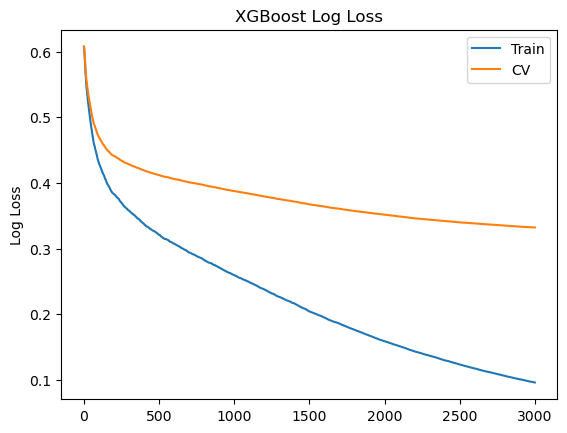

Number of misclassified points  13.218607575043217


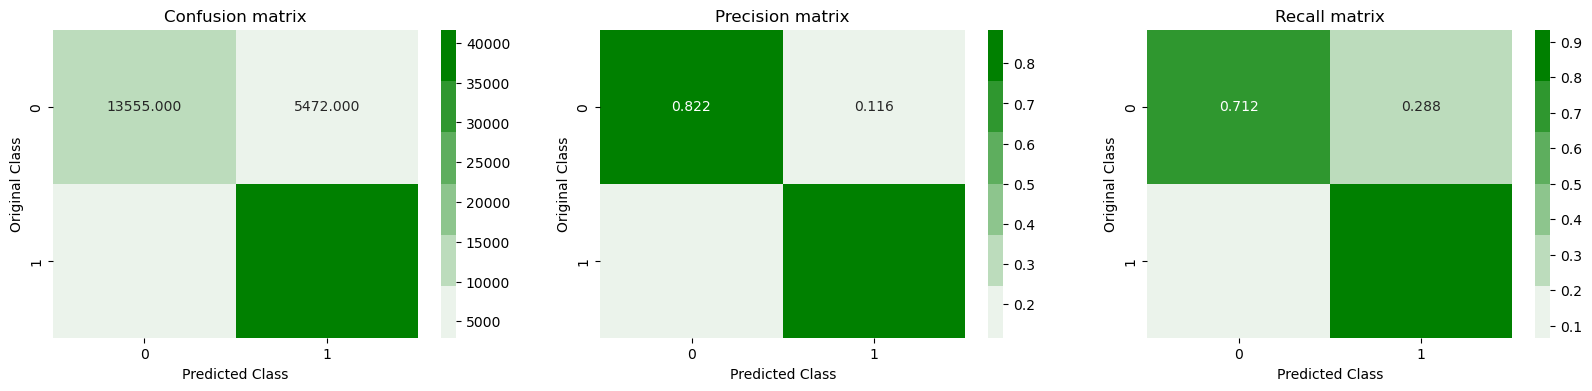

In [25]:
eval_set = [(X_tr_4, y_train), (X_cv_4, y_cv)]

x_cfl_4=XGBClassifier(n_estimators=3000,subsample=0.5,max_depth=10,learning_rate=0.03,colsample_bytree=0.3,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_4.fit(X_tr_4,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)
x_sig_clf_4 = CalibratedClassifierCV(x_cfl_4, method="sigmoid")
x_sig_clf_4.fit(X_tr_4, y_train)

model_metrics(x_sig_clf_4,X_tr_4,X_te_4,X_cv_4)

results = x_cfl_4.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_4.predict(X_te_4))

In [26]:
print('Ngram Bow Model saved')
joblib.dump(x_sig_clf_4,'../BDS_project/ngram_bow_model.pkl')

Ngram Bow Model saved


['../BDS_project/ngram_bow_model.pkl']

### Set -5 Extracted Features + Sentiment Scores + Reviews TF-IDF (ngram) vectors

In [27]:
# selecting only 2,3,4 grams to vectorize using tfidf vectorizer.

ngram_vec_tfidf = TfidfVectorizer(ngram_range=(2,4),vocabulary=vocab)
ngram_vec_tfidf.fit(vocab)
print('New vectorizer vocab size:',ngram_vec_tfidf.get_feature_names_out().shape[0])
print('Saving the new vectorizer with above selected vocabulary..')
joblib.dump(ngram_vec_tfidf,'../BDS_project/datangram_vec_tfidf.pkl')

New vectorizer vocab size: 2283
Saving the new vectorizer with above selected vocabulary..


['../BDS_project/datangram_vec_tfidf.pkl']

In [29]:
vec_tfidf = joblib.load('../BDS_project/datangram_vec_tfidf.pkl')

X_train_review_tfidf_ngram = vec_tfidf.transform(X_train['cleaned_review'].values)
X_test_review_tfidf_ngram = vec_tfidf.transform(X_test['cleaned_review'].values)
X_cv_review_tfidf_ngram = vec_tfidf.transform(X_cv['cleaned_review'].values)


print('After Vectorization')
print('Train data shape:',X_train_review_tfidf_ngram.shape)
print('Test data shape:',X_test_review_tfidf_ngram.shape)
print('CV data shape:',X_cv_review_tfidf_ngram.shape)

After Vectorization
Train data shape: (103927, 2283)
Test data shape: (63630, 2283)
CV data shape: (44541, 2283)


In [30]:
#concatenating all encoded features for set 5
from scipy.sparse import hstack
X_tr_5 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_tfidf_ngram)).tocsr()

X_te_5 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_tfidf_ngram)).tocsr()

X_cv_5 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_tfidf_ngram)).tocsr()

print("Final Data matrix")
print(X_tr_5.shape, y_train.shape)
print(X_te_5.shape, y_test.shape)
print(X_cv_5.shape, y_cv.shape)


Final Data matrix
(103927, 2314) (103927,)
(63630, 2314) (63630,)
(44541, 2314) (44541,)


#### XGB Classifier on Set 5 Features

In [ ]:
param = {'n_estimators':[100,500,1000,2000,3000]}

x_clf =XGBClassifier(nthread=-1,eval_metric='logloss',objective='binary:logistic', random_state=0)

random_xgb = RandomizedSearchCV(x_clf,param_distributions=param,scoring='f1',verbose=0,n_jobs=-1,cv=3)
random_xgb.fit(X_tr_5,y_train)

print(random_xgb.best_params_)

In [ ]:
#https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

eval_set = [(X_tr_5, y_train), (X_cv_5, y_cv)]

x_clf =XGBClassifier(n_estimators=3000,nthread=-1,objective='binary:logistic',random_state=0)
x_clf.fit(X_tr_5,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0)
sig_clf = CalibratedClassifierCV(x_clf, method="sigmoid")
sig_clf.fit(X_tr_5, y_train)


model_metrics(sig_clf,X_tr_5,X_te_5,X_cv_5)

results = x_clf.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, sig_clf.predict(X_te_5))

#### Hyperparameter Tuning for XGB Classifier  

In [ ]:
x_cfl_5 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_5 = RandomizedSearchCV(x_cfl_5,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_5.fit(X_tr_5,y_train)

print(x_random_cfl_5.best_params_)

**LogLoss**
The train log loss is: 0.15020022282762266
The cross validation log loss is: 0.36048028930365883
The test log loss is: 0.36264384456315546
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9999903778613835
The cross validation Accuracy is: 0.8634067488381492
The test Accuracy is: 0.8623448059091623
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.999993136534911
The cross validation F1 score is: 0.9059456451164085
The test F1 score is: 0.9051717604772268
--------------------------------------------------
**AUC**
The train AUC is: 0.9999839114486131
The cross validation AUC is: 0.8129559343073638
The test AUC is: 0.8120036461284016
--------------------------------------------------


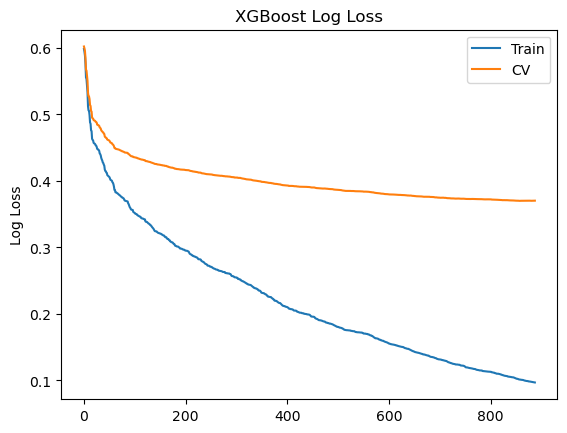

Number of misclassified points  13.765519409083765


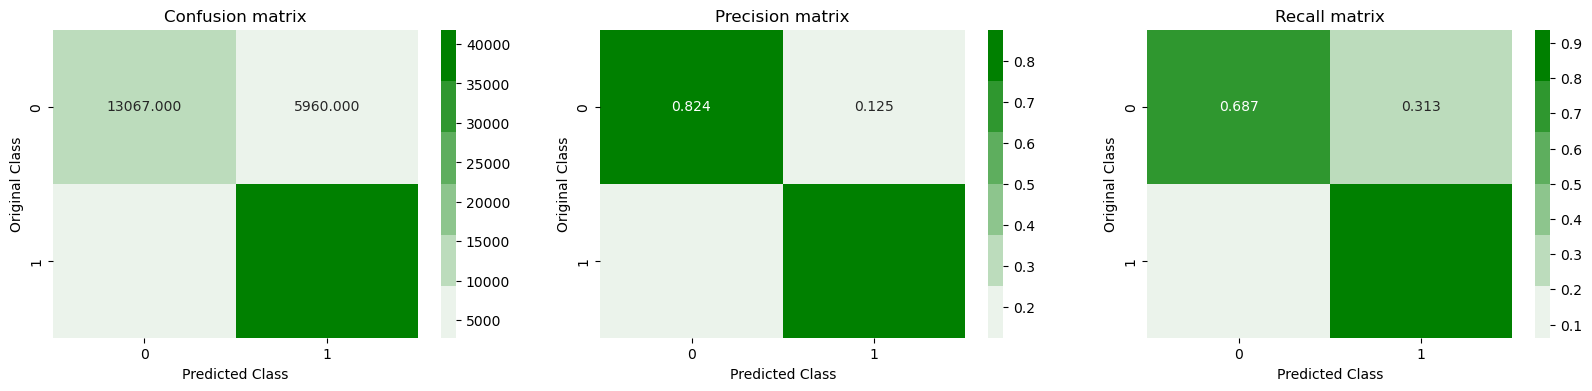

In [31]:
eval_set = [(X_tr_5, y_train), (X_cv_5, y_cv)]

x_cfl_5=XGBClassifier(n_estimators=3000,subsample=0.5,max_depth=10,learning_rate=0.2,colsample_bytree=0.1,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_5.fit(X_tr_5,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)
x_sig_clf_5 = CalibratedClassifierCV(x_cfl_5, method="sigmoid")
x_sig_clf_5.fit(X_tr_5, y_train)

model_metrics(x_sig_clf_5,X_tr_5,X_te_5,X_cv_5)

results = x_cfl_5.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


plot_confusion_matrix(y_test, x_sig_clf_5.predict(X_te_5))

In [32]:
print('Ngram TFIDF Model saved')
joblib.dump(x_sig_clf_5,'../BDS_project/ngram_tfidf_model.pkl')

Ngram TFIDF Model saved


['../BDS_project/ngram_tfidf_model.pkl']

<b>Observations:</b>
- The n-grams (both Bow and TF-IDF) has also performed good with only considerable features. Hence considering unigram and n-gram(2,3,4) feature set models for both BoW and TF-IDF.

#### Building the Word2Vec embeddings for the words in our dataset using Gensim

In [18]:
from gensim.models import Word2Vec

In [19]:
sentences = []
for r in tqdm(data['cleaned_review']):
    sentences.append(r.split())

100%|███████████████████████████████████████████████████████████████████████| 212098/212098 [00:02<00:00, 98813.31it/s]


In [20]:
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
# https://radimrehurek.com/gensim/models/word2vec.html

model = Word2Vec(sentences,vector_size=300,workers=12,min_count=1)
print(model)
model.save('word2vec.bin')


Word2Vec<vocab=34666, vector_size=300, alpha=0.025>


In [21]:
model = Word2Vec.load('word2vec.bin')

In [22]:
def create_w2v(df,feature):
    '''This function creates the w2v embeddings for the cleaned reviews passed'''

    w2v_vector =[]
    for review in df[feature]:
        vector = np.zeros(300)

        for word in review.split():
            if word in model.wv.key_to_index:
                vector += model.wv[word]

        w2v_vector.append(vector)
    w2v_vector = np.array(w2v_vector)
    return w2v_vector



In [23]:
X_train_review_w2v = create_w2v(X_train,'cleaned_review')
X_test_review_w2v = create_w2v(X_test,'cleaned_review')
X_cv_review_w2v = create_w2v(X_cv,'cleaned_review')

print('After word embeddings')
print('Train data size is:',X_train_review_w2v.shape)
print('Test data size is:',X_test_review_w2v.shape)
print('CV data size is:',X_cv_review_w2v.shape)

After word embeddings
Train data size is: (103927, 300)
Test data size is: (63630, 300)
CV data size is: (44541, 300)


### Set -6 Extracted Features + Sentiment Scores + Reviews Word2Vec vectors

In [24]:
#concatenating all encoded features for set 6

from scipy.sparse import hstack
X_tr_6 = np.concatenate((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_w2v),axis=1)

X_te_6 = np.concatenate((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_w2v),axis=1)

X_cv_6 = np.concatenate((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_w2v),axis=1)

print("Final Data matrix")
print(X_tr_6.shape, y_train.shape)
print(X_te_6.shape, y_test.shape)
print(X_cv_6.shape, y_cv.shape)



Final Data matrix
(103927, 331) (103927,)
(63630, 331) (63630,)
(44541, 331) (44541,)


#### XGB Classifier on Set 3 Features

#### Hyperparameter Tuning for XGB Classifier  

In [ ]:
x_cfl_6 = XGBClassifier()
prams={
'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
'n_estimators':[100,500,1000,2000,3000],
'max_depth':[3,5,7,10],
'colsample_bytree':[0.1,0.3,0.5,1],
'subsample':[0.1,0.3,0.5,1]
}
x_random_cfl_6 = RandomizedSearchCV(x_cfl_6,param_distributions=prams,verbose=0,n_jobs=-1,cv=3,scoring='f1')
x_random_cfl_6.fit(X_tr_6,y_train)

print(x_random_cfl_6.best_params_)

#### Training the XGB Classifier with best parameters

**LogLoss**
The train log loss is: 0.09455942942651578
The cross validation log loss is: 0.2832827693278789
The test log loss is: 0.28947682954405457
--------------------------------------------------
**Accuracy**
The train Accuracy is: 0.9999903778613835
The cross validation Accuracy is: 0.898947037560899
The test Accuracy is: 0.8952380952380953
--------------------------------------------------
**F1 Score**
The train F1 score is: 0.999993136534911
The cross validation F1 score is: 0.9295320401421572
The test F1 score is: 0.9270087379278628
--------------------------------------------------
**AUC**
The train AUC is: 0.9999839114486131
The cross validation AUC is: 0.8640948049644688
The test AUC is: 0.8590784360291794
--------------------------------------------------


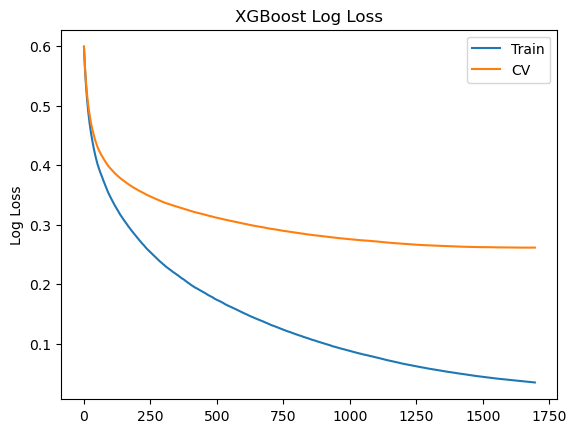

In [25]:
eval_set = [(X_tr_6, y_train), (X_cv_6, y_cv)]

x_cfl_6=XGBClassifier(n_estimators=3000,subsample=1,max_depth=7,learning_rate=0.05,colsample_bytree=1,nthread=-1,objective='binary:logistic', random_state=0)
x_cfl_6.fit(X_tr_6,y_train,eval_set=eval_set,eval_metric='logloss',verbose=0,early_stopping_rounds=30)
x_sig_clf_6 = CalibratedClassifierCV(x_cfl_6, method="sigmoid")
x_sig_clf_6.fit(X_tr_6, y_train)

model_metrics(x_sig_clf_6,X_tr_6,X_te_6,X_cv_6)

results = x_cfl_6.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='CV')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


#plot_confusion_matrix(y_test, x_sig_clf_6.predict(X_te_6))

In [26]:
import joblib
print('W2V Model saved')
joblib.dump(x_sig_clf_6,'../BDS_project/W2V Model.pkl')

W2V Model saved


['../BDS_project/W2V Model.pkl']

The W2v embeddings features are also useful. The model has a F1 score of 0.928

### Model Evaluation Metrics summary

In [17]:
!pip install prettytable
from prettytable import PrettyTable

In [4]:
model_1 = joblib.load('../BDS_project/extracted_model.pkl')
model_2 = joblib.load('../BDS_project/Bow_model.pkl')
model_3 = joblib.load('../BDS_project/tfidf_model.pkl')
model_4 = joblib.load('../BDS_project/ngram_bow_model.pkl')
model_5 = joblib.load('../BDS_project/ngram_tfidf_model.pkl')
model_6 = joblib.load('../BDS_project/W2V Model.pkl')

In [5]:
vect_bow_1 = joblib.load('../BDS_project/vectorizer_bow.pkl')

X_train_review_bow_1 = vect_bow_1.transform(X_train['cleaned_review'].values)
X_test_review_bow_1 = vect_bow_1.transform(X_test['cleaned_review'].values)
X_cv_review_bow_1 = vect_bow_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_bow_1.shape)
print('Test data shape:',X_test_review_bow_1.shape)
print('CV data shape:',X_cv_review_bow_1.shape)

from sklearn.preprocessing import LabelEncoder

lab_enc_cond = LabelEncoder()

lab_enc_cond.fit(X['condition'].values)

X_train_condition = lab_enc_cond.transform(X_train['condition'].values).reshape(-1,1)
X_test_condition = lab_enc_cond.transform(X_test['condition'].values).reshape(-1,1)
X_cv_condition = lab_enc_cond.transform(X_cv['condition'].values).reshape(-1,1)

from scipy.sparse import hstack
X_tr_2 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_bow_1)).tocsr()

X_te_2 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_bow_1)).tocsr()

X_cv_2 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_bow_1)).tocsr()

print("Final Data matrix")
print(X_tr_2.shape, y_train.shape)
print(X_te_2.shape, y_test.shape)
print(X_cv_2.shape, y_cv.shape)

NameError: name 'X_train' is not defined

In [23]:
#concatenating all encoded features for set 3

vect_tfidf_1 = joblib.load('../BDS_project/vectorizer_tfidf.pkl')


X_train_review_tfidf_1 = vect_tfidf_1.transform(X_train['cleaned_review'].values)
X_test_review_tfidf_1 = vect_tfidf_1.transform(X_test['cleaned_review'].values)
X_cv_review_tfidf_1 = vect_tfidf_1.transform(X_cv['cleaned_review'].values)

print('After Vectorization')
print('Train data shape:',X_train_review_tfidf_1.shape)
print('Test data shape:',X_test_review_tfidf_1.shape)
print('CV data shape:',X_cv_review_tfidf_1.shape)

from scipy.sparse import hstack
X_tr_3 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_tfidf_1)).tocsr()

X_te_3 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_tfidf_1)).tocsr()

X_cv_3 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_tfidf_1)).tocsr()

print("Final Data matrix")
print(X_tr_3.shape, y_train.shape)
print(X_te_3.shape, y_test.shape)
print(X_cv_3.shape, y_cv.shape)



After Vectorization
Train data shape: (103927, 7309)
Test data shape: (63630, 7309)
CV data shape: (44541, 7309)
Final Data matrix
(103927, 7340) (103927,)
(63630, 7340) (63630,)
(44541, 7340) (44541,)


In [24]:
#concatenating all encoded features for set 4

vec_bow = joblib.load('../BDS_project/ngram_vec_bow.pkl')

X_train_review_bow_ngram = vec_bow.transform(X_train['cleaned_review'].values)
X_test_review_bow_ngram = vec_bow.transform(X_test['cleaned_review'].values)
X_cv_review_bow_ngram = vec_bow.transform(X_cv['cleaned_review'].values)


print('After Vectorization')
print('Train data shape:',X_train_review_bow_ngram.shape)
print('Test data shape:',X_test_review_bow_ngram.shape)
print('CV data shape:',X_cv_review_bow_ngram.shape)

from scipy.sparse import hstack
X_tr_4 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_bow_ngram)).tocsr()

X_te_4 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_bow_ngram)).tocsr()

X_cv_4 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_bow_ngram)).tocsr()

print("Final Data matrix")
print(X_tr_4.shape, y_train.shape)
print(X_te_4.shape, y_test.shape)
print(X_cv_4.shape, y_cv.shape)

After Vectorization
Train data shape: (103927, 2283)
Test data shape: (63630, 2283)
CV data shape: (44541, 2283)
Final Data matrix
(103927, 2314) (103927,)
(63630, 2314) (63630,)
(44541, 2314) (44541,)


In [25]:
#concatenating all encoded features for set 5
vec_tfidf = joblib.load('../BDS_project/datangram_vec_tfidf.pkl')

X_train_review_tfidf_ngram = vec_tfidf.transform(X_train['cleaned_review'].values)
X_test_review_tfidf_ngram = vec_tfidf.transform(X_test['cleaned_review'].values)
X_cv_review_tfidf_ngram = vec_tfidf.transform(X_cv['cleaned_review'].values)


print('After Vectorization')
print('Train data shape:',X_train_review_tfidf_ngram.shape)
print('Test data shape:',X_test_review_tfidf_ngram.shape)
print('CV data shape:',X_cv_review_tfidf_ngram.shape)

from scipy.sparse import hstack
X_tr_5 = hstack((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_tfidf_ngram)).tocsr()

X_te_5 = hstack((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_tfidf_ngram)).tocsr()

X_cv_5 = hstack((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_tfidf_ngram)).tocsr()

print("Final Data matrix")
print(X_tr_5.shape, y_train.shape)
print(X_te_5.shape, y_test.shape)
print(X_cv_5.shape, y_cv.shape)

After Vectorization
Train data shape: (103927, 2283)
Test data shape: (63630, 2283)
CV data shape: (44541, 2283)
Final Data matrix
(103927, 2314) (103927,)
(63630, 2314) (63630,)
(44541, 2314) (44541,)


In [26]:
from gensim.models import Word2Vec

sentences = []
for r in tqdm(data['cleaned_review']):
    sentences.append(r.split())

model = Word2Vec(sentences,vector_size=300,workers=12,min_count=1)
print(model)
model.save('word2vec.bin')
model = Word2Vec.load('word2vec.bin')

def create_w2v(df,feature):
    '''This function creates the w2v embeddings for the cleaned reviews passed'''

    w2v_vector =[]
    for review in df[feature]:
        vector = np.zeros(300)

        for word in review.split():
            if word in model.wv.key_to_index:
                vector += model.wv[word]

        w2v_vector.append(vector)
    w2v_vector = np.array(w2v_vector)
    return w2v_vector

X_train_review_w2v = create_w2v(X_train,'cleaned_review')
X_test_review_w2v = create_w2v(X_test,'cleaned_review')
X_cv_review_w2v = create_w2v(X_cv,'cleaned_review')

print('After word embeddings')
print('Train data size is:',X_train_review_w2v.shape)
print('Test data size is:',X_test_review_w2v.shape)
print('CV data size is:',X_cv_review_w2v.shape)

from scipy.sparse import hstack
X_tr_6 = np.concatenate((X_train_num_2,X_train_sent_score,X_train_condition,X_train_year,X_train_review_w2v),axis=1)

X_te_6 = np.concatenate((X_test_num_2,X_test_sent_score,X_test_condition,X_test_year,X_test_review_w2v),axis=1)

X_cv_6 = np.concatenate((X_cv_num_2,X_cv_sent_score,X_cv_condition,X_cv_year,X_cv_review_w2v),axis=1)

print("Final Data matrix")
print(X_tr_6.shape, y_train.shape)
print(X_te_6.shape, y_test.shape)
print(X_cv_6.shape, y_cv.shape)

100%|███████████████████████████████████████████████████████████████████████| 212098/212098 [00:02<00:00, 84032.65it/s]


Word2Vec<vocab=34666, vector_size=300, alpha=0.025>
After word embeddings
Train data size is: (103927, 300)
Test data size is: (63630, 300)
CV data size is: (44541, 300)
Final Data matrix
(103927, 331) (103927,)
(63630, 331) (63630,)
(44541, 331) (44541,)


In [22]:
t = PrettyTable()
t.field_names = ['Models','F1 Score(Train Data)','F1 Score(Test Data)']
t.add_row(['XGBOOST+BoW(1gram)',f1_score(y_train,model_2.predict(X_tr_2)),f1_score(y_test,model_2.predict(X_te_2))])
t.add_row(['XGBOOST+TF-IDF(1gram)',f1_score(y_train,model_3.predict(X_tr_3)),f1_score(y_test,model_3.predict(X_te_3))])
t.add_row(['XGBOOST+BoW(n-grams)',f1_score(y_train,model_4.predict(X_tr_4)),f1_score(y_test,model_4.predict(X_te_4))])
t.add_row(['XGBOOST+TFIDF(n-gram)',f1_score(y_train,model_5.predict(X_tr_5)),f1_score(y_test,model_5.predict(X_te_5))])
t.add_row(['XGBOOST+Word2Vec',f1_score(y_train,model_6.predict(X_tr_6)),f1_score(y_test,model_6.predict(X_te_6))])
print(t)

NameError: name 'X_tr_3' is not defined

### Recommendation system

In [27]:
def userful_count(data,feature):
    '''this function takes dataframe and feature as input and normalize the given feature'''

    max_value = data[feature].max()
    min_value = data[feature].min()
    data[feature] = (data[feature] - min_value) / (max_value - min_value)
    return data

In [28]:
# Each model predictions are stored as one column and recommendation score is calculated by adding predictions
# of 5 models multiplied by its normalized useful count

X_test['model2'] = model_2.predict(X_te_2)
X_test['model3'] = model_3.predict(X_te_3)
X_test['model4'] = model_4.predict(X_te_4)
X_test['model5'] = model_5.predict(X_te_5)
X_test['model6'] = model_6.predict(X_te_6)

X_test =  userful_count(X_test,'usefulCount')
#X_test['usefulCount'] = X_test['usefulCount']/X_test['user_size']

X_test['rec_score'] = (X_test['model2']+X_test['model3']+X_test['model4']+X_test['model5']+X_test['model6'])*X_test['usefulCount']

X_test.head()

,drugName,condition,usefulCount,cleaned_review,sentiment_score,sentiment_score_clean,year,word_count,unique_word_count,char_length,...,16,17,18,19,model2,model3,model4,model5,model6,rec_score
133439,coreg,heart failure,0.024787,heart attack june day hospit doctor put coreg ...,0.6808,0.7964,2010,21,19,119,...,0.107113,0.010030,0.012396,0.005568,1,1,1,1,1,0.123935
136010,rizatriptan,migraine,0.013168,suffer migrain sinc year old maxalt migrain me...,-0.7974,-0.7717,2015,40,30,243,...,0.041635,0.007613,0.009409,0.004227,1,1,1,1,1,0.065840
63258,restasis,keratoconjunctivitis sicca,0.027885,yes burn get medic actual solut bandaid proble...,-0.1101,-0.7351,2016,68,51,394,...,0.074341,0.006877,0.032660,0.003818,1,1,1,1,1,0.139427
74865,sertraline,social anxiety disorde,0.009295,think end start take pure desper use horribl f...,-0.9041,-0.0258,2015,70,58,421,...,0.188237,0.006270,0.007750,0.003481,1,1,1,1,1,0.046476
2537,amphetamine / dextroamphetamine,adhd,0.007746,prescrib mg st day could liter feel releas med...,-0.9639,-0.3887,2017,77,68,470,...,0.122575,0.026021,0.017254,0.013328,0,0,0,0,0,0.000000


In [29]:
X_test.to_csv('../BDS_project/validation_data.csv',index=False)

In [30]:
# grouping the datafrom with respect to condition and drugname.

df = X_test.groupby(['condition','drugName']).agg({'rec_score':['sum']})


In [ ]:
df.tail()

<b> Validation for one condition </b>

In [ ]:
X_test[X_test['condition']=='zen shoulde'].sort_values(by=['rec_score'],ascending=False)

<b> Observations:</b>
- The drug named 'diclofenac' for condition 'zen shoulde' is present two times. Based on the 5 models prediction and useful count, the recommendation score is calculated. The final score of each drug is calculated by addition of same drugs score for a given condition. Hence for this condition,'diclofenac' this drug is recommended with high score

- Based on some observations like for condition 'birth control' we have total of 11563 entries for different drugs used. And for each drug for ex- 'etonogestrel(1309)','ethinyl estradiol / norethindrone(909)','levonorgestrel(850)' we have many entries. By aggreating the rec_score using 'mean' the score for these highly used drugs gets lowered due to which the lowest rated/used drugs are recommended after aggregation.
- Hence aggregating using 'sum' is used in which scores of same drugs are added together.

In [31]:
def recommend(condition):
    '''this function takes the given condition as input and returns the top drugs based on highest rec scores'''
    data = pd.read_csv('../BDS_project/validation_data.csv')
    select = data[data['condition']==condition]
    drug_count = select['drugName'].nunique()
    select['rec_score'] = select['rec_score']/drug_count
    group_drug = select.groupby(['drugName']).agg({'rec_score':['sum']})
    group_drug = group_drug[('rec_score', 'sum')].sort_values(ascending=False)
    drug_score = dict(group_drug)
    if len(drug_score)>5:
        print('Top 5 Drugs for the condition : {0}'.format(condition.upper()))
        for i in list(drug_score.keys())[0:5]:
            print('-',i)

    else:
        print('Top  Drugs for the condition : {0}'.format(condition.upper()))
        for i in drug_score.keys():
            print('-',i)


In [32]:
recommend('birth control')

Top 5 Drugs for the condition : BIRTH CONTROL
-> etonogestrel
-> ethinyl estradiol / norethindrone
-> levonorgestrel
-> ethinyl estradiol / norgestimate
-> mirena


In [33]:
recommend('heart failure')

Top 5 Drugs for the condition : HEART FAILURE
-> carvedilol
-> coreg
-> entresto
-> digoxin
-> imdur


In [34]:
recommend('cancer')

Top  Drugs for the condition : CANCER


In [35]:
X_test['condition']

133439                 heart failure
136010                      migraine
63258     keratoconjunctivitis sicca
74865         social anxiety disorde
2537                            adhd
                     ...            
187076             bowel preparation
48234                           pain
24553                    weight loss
211572                          pain
104265                          acne
Name: condition, Length: 63630, dtype: object

In [36]:
recommend('insomnia')

Top 5 Drugs for the condition : INSOMNIA
-> trazodone
-> zolpidem
-> ambien
-> quetiapine
-> mirtazapine


In [37]:
recommend('migraine')

Top 5 Drugs for the condition : MIGRAINE
-> gabapentin
-> rizatriptan
-> sumatriptan
-> imitrex
-> eletriptan
